<a href="https://colab.research.google.com/github/nspeer12/CAP4630_homework1/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import tensorflow as tf

In [2]:
def upward_paraboloid(x, y):
  return (10 * x**2) + (10 * y**2)

def downward_paraboloid(x, y):
  return (-10 * x**2) + (-10 * y**2)

def hyperbolic_paraboloid(x, y):
    return (10 * x**2) - (10 * y**2)

In [3]:
X = [np.linspace(-6, 6, 100),np.linspace(-6, 6, 100)] 
X[0], X[1] = np.meshgrid(X[0], X[1])
y1 = upward_paraboloid(X[0], X[1])
y2 = downward_paraboloid(X[0],X[1])
y3 = hyperbolic_paraboloid(X[0],X[1])

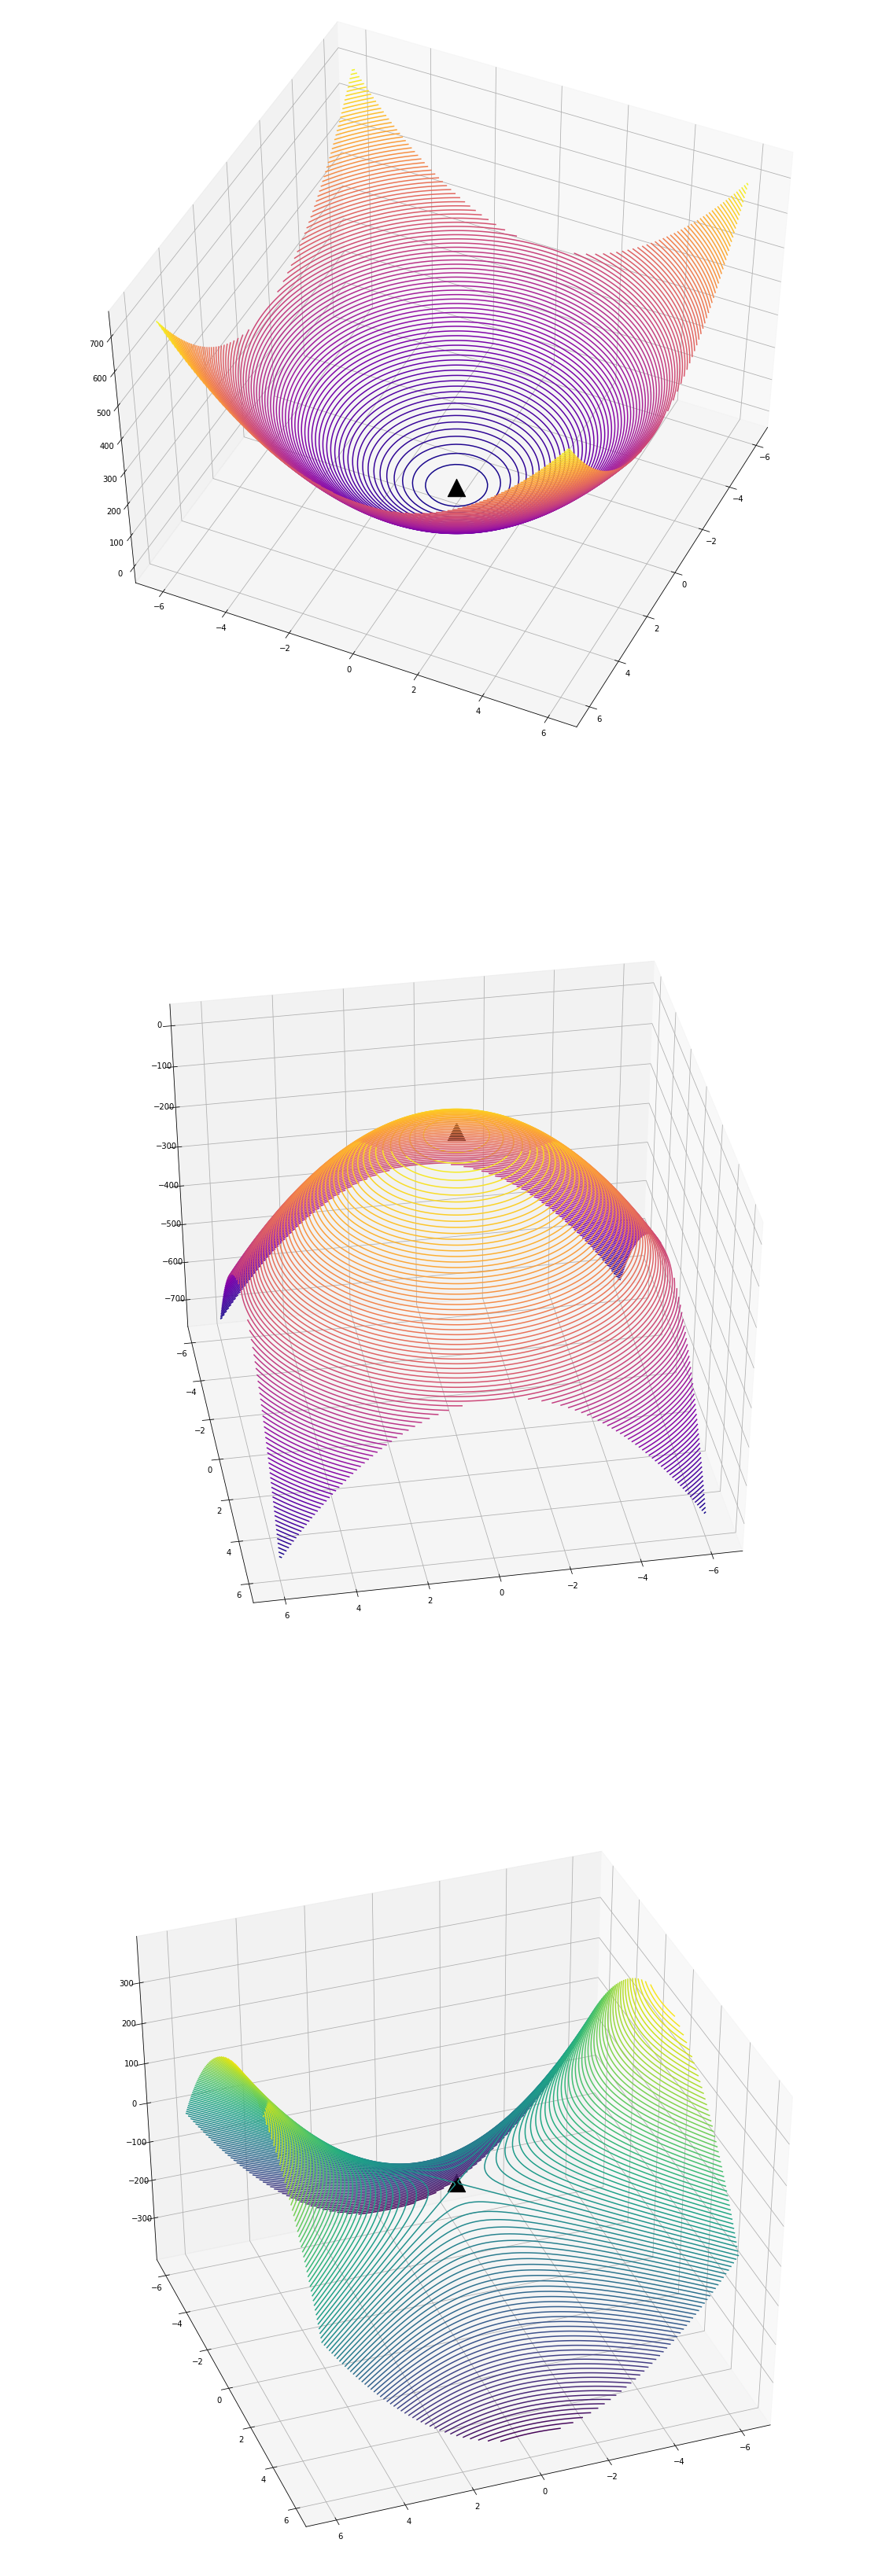

In [4]:
fig, axs = plt.subplots(3, subplot_kw=dict(projection='3d'), figsize=(20,60))

axs[0].scatter(0,0,0, s=500, c='black', marker='^')
axs[0].contour3D(X[0], X[1], y1, 100, cmap='plasma')
axs[0].view_init(50, 25)
 
axs[1].contour3D(X[0], X[1], y2, 100, cmap='plasma')
axs[1].scatter(0,0,0, s=500, c='black', marker='^')
axs[1].view_init(40, 80)

axs[2].contour3D(X[0], X[1], y3, 100, cmap='viridis')
axs[2].scatter(0,0,0, s=500, c='black', marker='^')
axs[2].view_init(40,70)

plt.show()

# Problem 2
Multi-dimensional linear regression implemented in NumPy

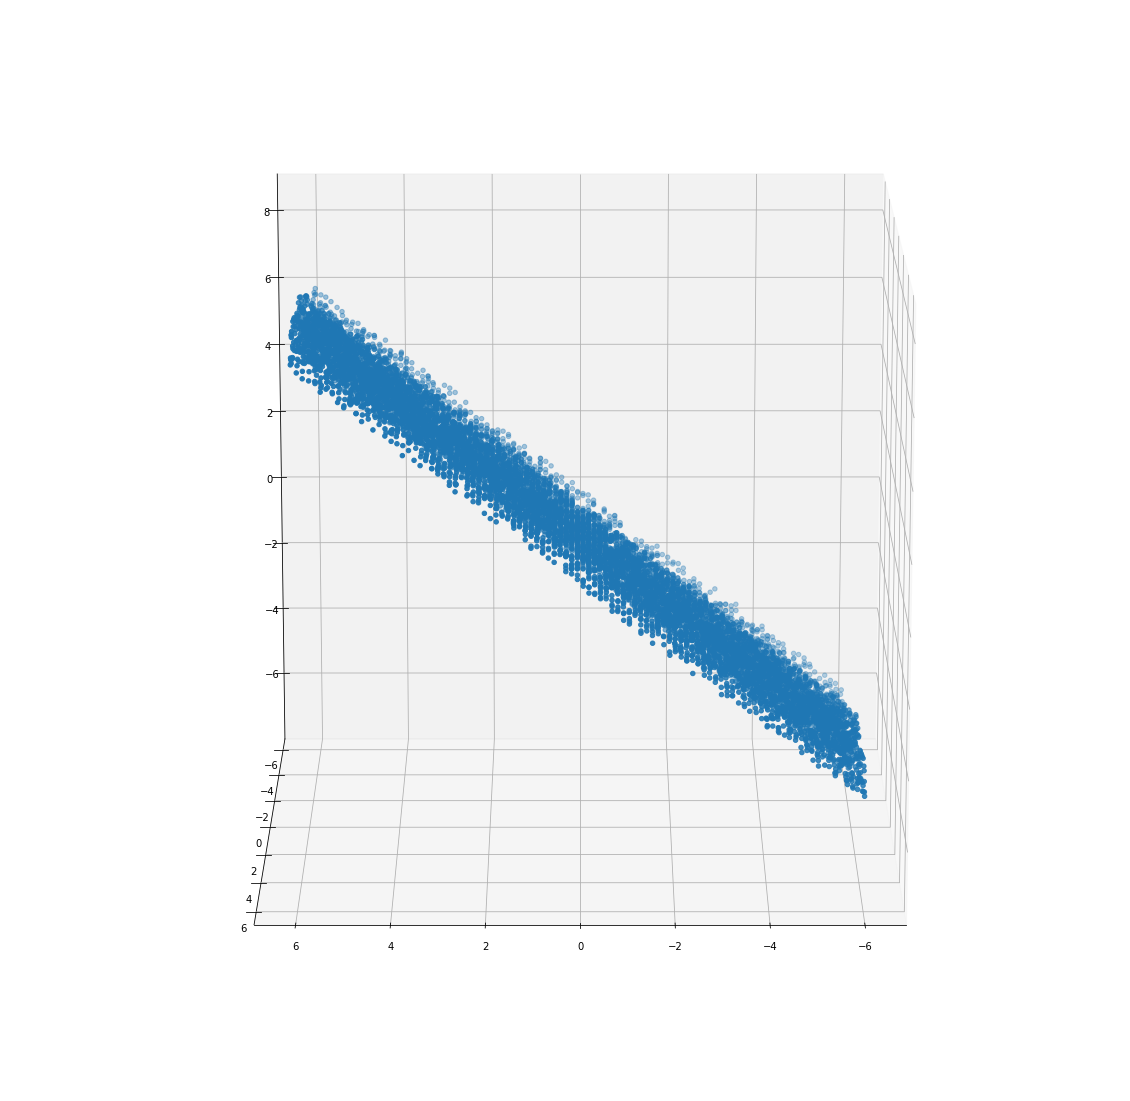

In [5]:
m = 100
X = [np.linspace(-6, 6, m),np.linspace(-6, 6, m)] 
X[0], X[1] = np.meshgrid(X[0], X[1])

# semi random points that can be regressed nicely
Y = np.add(np.add(np.tanh(X[1]) , np.random.rand(100, 100)), X[0])

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0], X[1], Y, cmap='plasma')
ax.view_init(15,90)

train_x = [X[0][:80], X[1][:80]]
test_x = [X[0][80:], X[1][80:]]

# just test y1 for now
train_y = Y[:80]
test_y = Y[80:]


In [44]:
# number of epochs
epochs = 100

# learning rate
lr = 0.01

# initial value for weight w
# bias term will be W[2]
W = np.zeros(2)
b = np.zeros(1)
# store the results of each epoch
preds = [None] * epochs

# extend this code for two dimensions
for e in range(epochs):
    y_pred = np.dot(np.transpose([W for i in range(80)]), train_x)# + b
        
    # update weights
    grad_w1 = np.dot((y_pred - train_y) * train_x)
    #grad_w2 = (y_pred - train_y) * train_x
   # grad_b = (y_pred - train_y)
    
    W[0] -= lr * grad_w1[i]
    W[1] -= lr * grad_w2[i]
    b -= lr * grad_b[i]
    
    # make prediction and store the 
    preds[e] = np.dot(np.transpose(X),W) - [b for i in range(m)]

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[0], X[1], Y, alpha=0.2)

colors = ['Purples', 'Blues', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# plotting the predictions of each regression
for i in range(epochs):
    ax.contour3D(X[0], X[1], preds[i], 500, cmap=colors[i % len(colors)])
    
ax.view_init(10,90)
plt.show()

ValueError: operands could not be broadcast together with shapes (2,2,100) (80,100) 

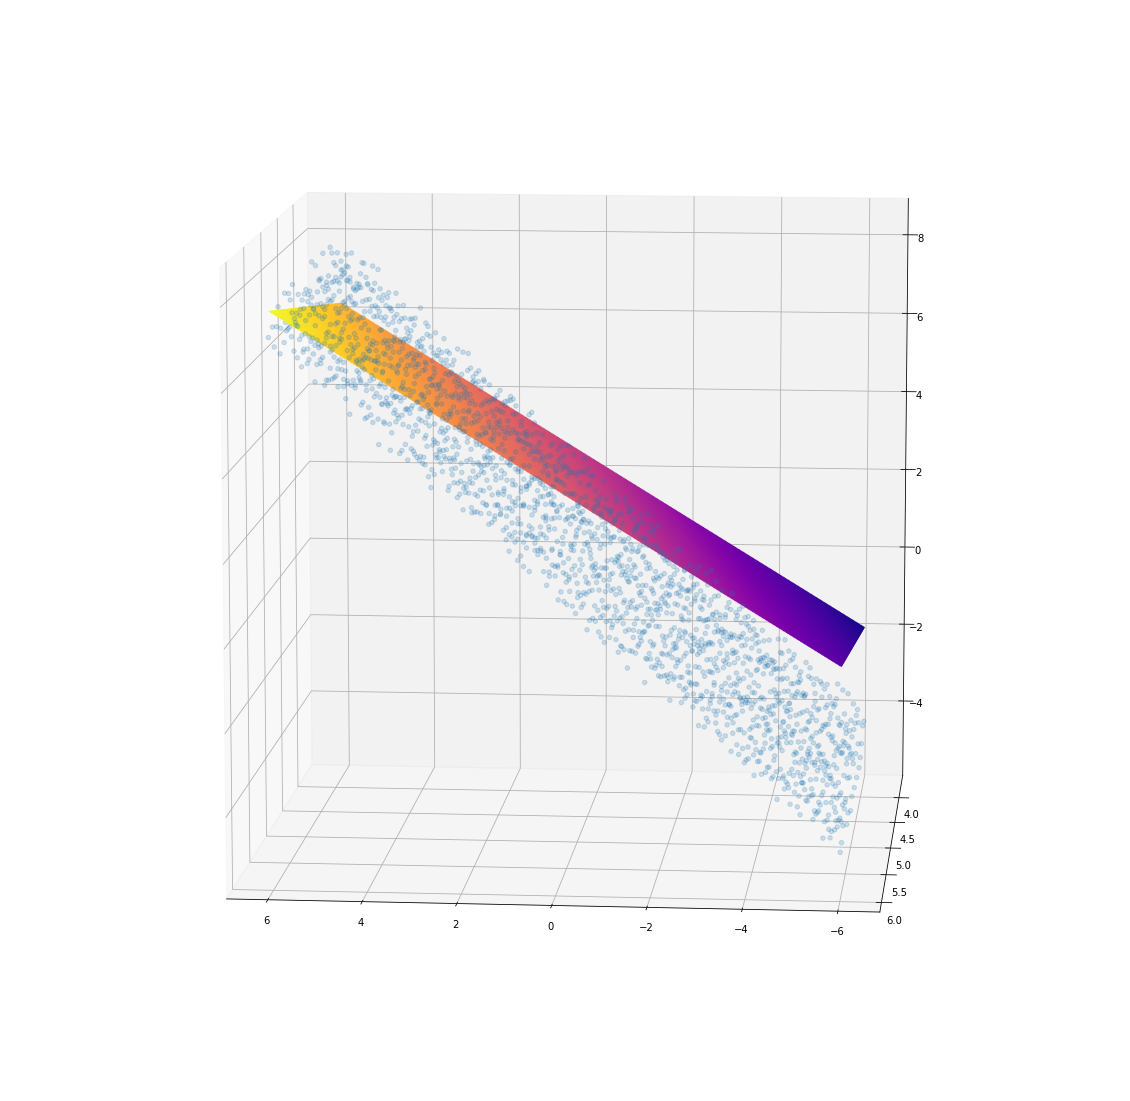

(1,)

In [14]:
# plot predictions
y_pred = np.dot(np.transpose(test_x),W) - [b for i in range(m)]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[0], test_x[1], test_y, alpha=0.2)
ax.contour3D(np.transpose(test_x[0]), np.transpose(test_x[1]), y_pred, 500, cmap='plasma')
ax.view_init(10,95)
plt.show()
b.shape

# Problem 3
Load the mnist dataset. Average out each digit and display what the average looks like

In [8]:
# Load data

# the built in function automatically loads this with a test train split,
# I will just use the training data for averaging 
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
# array to store all 10 of the 28x28 results
digits = np.zeros((10,28,28))

# frequency of each digit, used for averaging
freq = np.zeros(10)

# loop through training data and add it to its respective result array
for i in range(0, len(y_train)):
    freq[y_train[i]] += 1
    digits[y_train[i]] += (x_train[i])

# average out each matrix
for i in range(0,10):
    digits[i] /= freq[i]

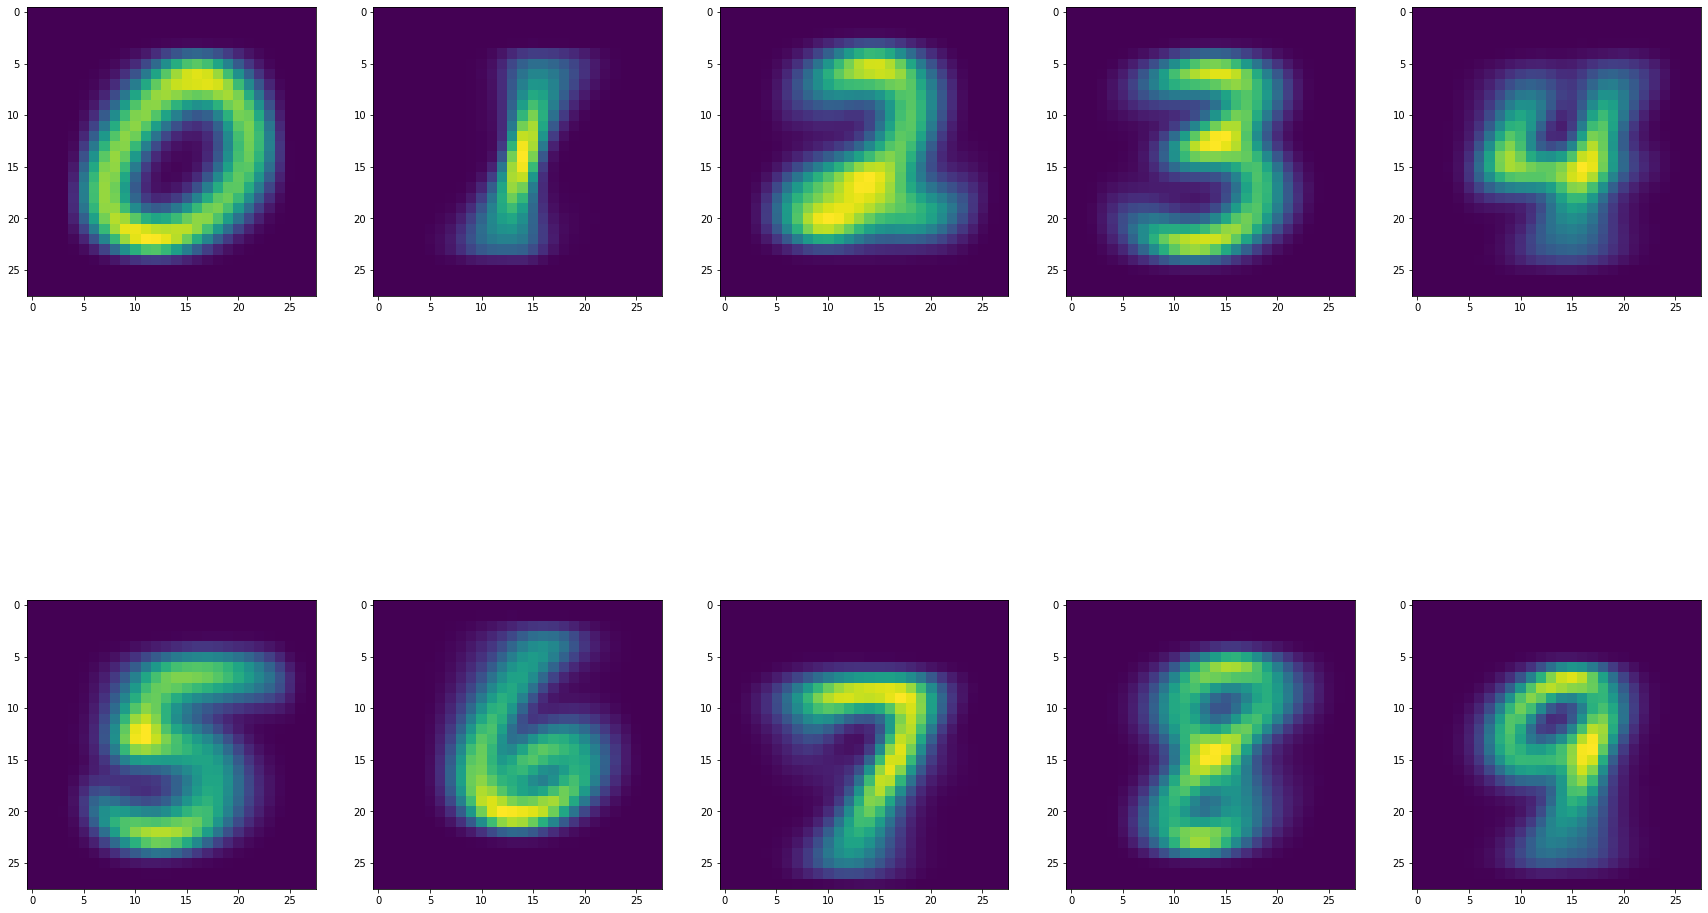

In [10]:
# plot results

fig, axs = plt.subplots(2,5, figsize=(30, 20))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(digits[i])